***
# <h1 align = 'center'>Cramér-Rao bound \& Maximum Likelihood</h1>  
#### <center> Ibrahim Resmouki </center>
#### <center> January 2021 </center>
***

## Exercice 1

Soit le modèle de mesure :
$$
    x(n) = C + b(n) \quad b(n) \sim \mathcal{N}(0, \sigma^2)
$$
avec $\sigma^2 = 2$.
Un estimateur efficace pour l'estimation de $C$ est :
$$
    \hat{C}(\mathbf{x}) = \sum_{i=0}^{N-1} x(i)
$$
avec $N$ le nombre d'observations.

Pour les simulations on pose $C = 7$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from pylab import rcParams
from numpy.linalg import inv
import pandas as pd

In C:\Users\iresm\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\iresm\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\iresm\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\iresm\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\iresm\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### Question 1.1. Générer 10000 échantillons du bruit.

In [2]:
# Code de la réponse à la question 1.1. Ne pas effacer ce commentaire.
mu_b = 0
sigma_b = np.sqrt(2)
b = np.random.normal(mu_b, sigma_b, 10000)

### Question 1.2. Générer 10000 observations.

In [3]:
# Code de la réponse à la question 1.2. Ne pas effacer ce commentaire.
C = 7
x = C + b

### Question 1.3. Calculer et afficher la moyenne des observations.

In [4]:
# Code de la réponse à la question 1.3. Ne pas effacer ce commentaire.
mu_x = np.mean(x)
print('La moyenne des observations est : ', mu_x)

La moyenne des observations est :  7.020133831800712


### Question 1.4. Calculer et afficher la variance des observations.

In [5]:
# Code de la réponse à la question 1.4. Ne pas effacer ce commentaire.
var_x = np.var(x)
print('La variance des observations est : ', var_x)

La variance des observations est :  2.005769649956931


### Question 1.5. Tracer l'histogramme des observations.

In [6]:
x

array([5.75141638, 7.66566894, 6.820283  , ..., 7.2837263 , 7.16218264,
       7.30222259])

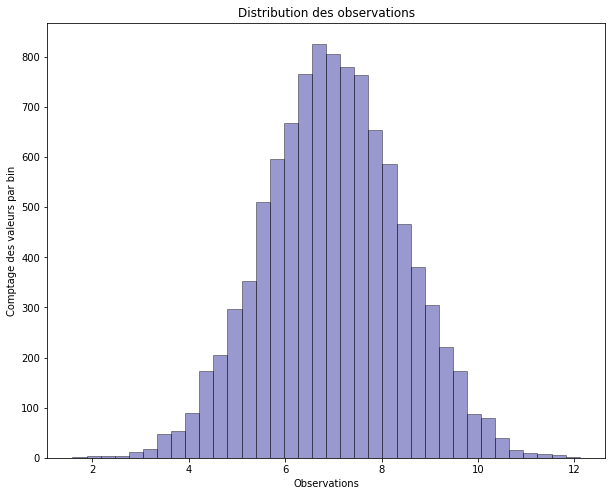

In [7]:
# Code de la réponse à la question 1.5. Ne pas effacer ce commentaire.
rcParams['figure.figsize'] = 10, 8
sns.distplot(x, hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel("Observations"), plt.ylabel("Comptage des valeurs par bin") 
plt.title('Distribution des observations')
plt.show()

### Question 1.6. Tracer la densité de probabilité théorique des observations.

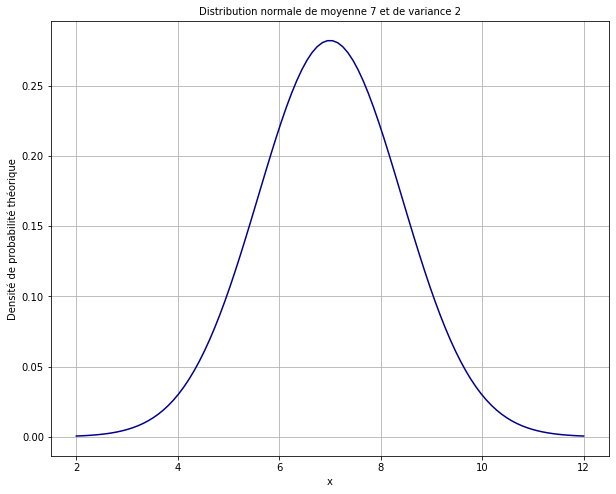

In [8]:
# Code de la réponse à la question 1.6. Ne pas effacer ce commentaire.
x_min = 2.0
x_max = 12.0

mean = C 
std = sigma_b

x_subdiv = np.linspace(x_min, x_max, 100)
y = norm.pdf(x_subdiv, mean, std)

plt.plot(x_subdiv,y, color='darkblue')
plt.grid()
plt.title("Distribution normale de moyenne 7 et de variance 2",fontsize=10)

plt.xlabel('x')
plt.ylabel('Densité de probabilité théorique')

plt.show()

### Question 1.7. Tracer sur une même figure l'histogramme des observations et la densité de probabilité théorique des observations.

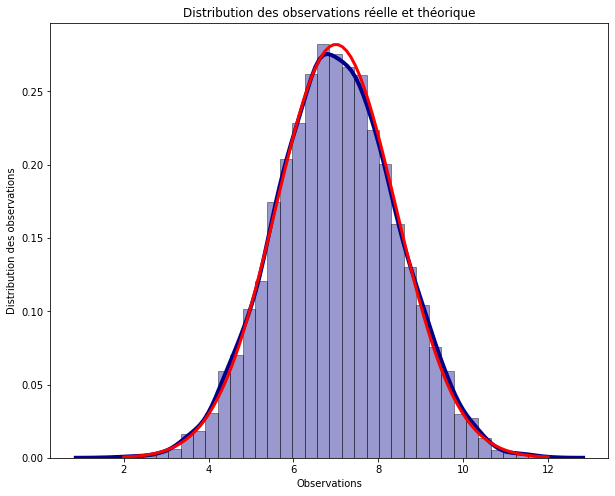

In [9]:
# Code de la réponse à la question 1.7. Ne pas effacer ce commentaire.
sns.distplot(x, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel("Observations"), plt.ylabel("Distribution des observations") 
plt.title('Distribution des observations réelle et théorique')
plt.plot(x_subdiv,y, color='red', linewidth = 3)
plt.show()

### Question 1.8. Commenter les résultats obtenus dans la cellule suivante.

Question 1.8. Ne pas effacer ce commentaire.

Avec 10.000 observations, nous remarquons que la répartition des données et très proche de la distribution théorique, malgré le bruit. De plus la constante $C = 7$ est très grande par rapport au bruit qui est de moyenne nulle et d'écart-type égal à $\sqrt2$.

## Exercice 2

A un instant $t = 0$, on fournit à un mobile à l'arrêt (position et vitesse sont nulles à l'instant initial) une accélération $a$ qui restera constante pour $t > 0$ sur l'intervalle d'observation. L'accélération étant inconnue, on cherche à l'estimer à partir de $N$ $(N > 1)$ mesures de la position $p$ du mobile. Ces mesures sont réalisées toutes les secondes à partir de $t = 0$. On note $p(n)$ la position du mobile à l'instant $n$, $y(n)$ la mesure de $p(n)$ et $Y$ le vecteur des $N$ mesures supposées indépendantes. On suppose que le processus de mesure introduit un bruit additif $b(n)$. Ce bruit de mesure est blanc gaussien de moyenne nulle et de variance 1.

### Question 2.9. Générer 10000 échantillons du bruit.

In [10]:
# Code de la réponse à la question 2.9. Ne pas effacer ce commentaire.
mu_b = 0
sigma_b = np.sqrt(1)
b = np.random.normal(mu_b, sigma_b, 10000)

### Question 2.10. après avoir déterminé le modèle de mesure reliant $y(n)$ à l'accélération, simuler 10000 points de mesure en prenant une accélération $a = 1ms^{-2}$.

Puisque l'accélération est constante pour $t > 0$, alors pour chaque instant $t_n$ on a : $p(n) = a\frac{t_{n}^2}{2}$. Puisque notre mesure est bruitée, alors : $y(n) = a\frac{t_{n}^2}{2} + b(n)$

In [11]:
# Code de la réponse à la question 2.10. Ne pas effacer ce commentaire.
a = 1
t = np.array([i for i in range (10000)])
y = (a*(t**2)/2) + b

### Question 2.11. Tracer le résultat de la question 2.10 en fonction du temps.

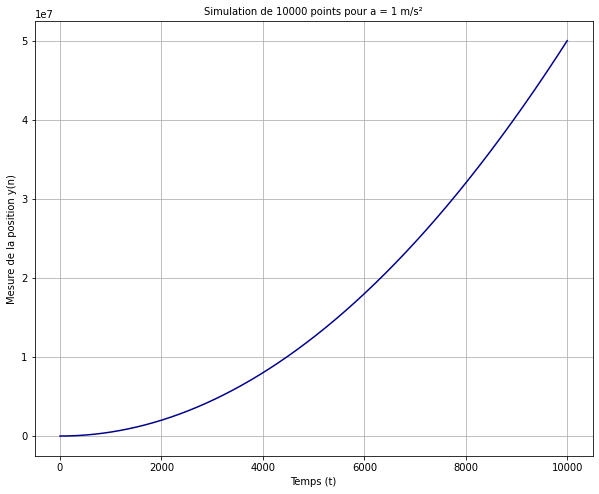

In [12]:
# Code de la réponse à la question 2.11. Ne pas effacer ce commentaire.
plt.plot(t, y, color='darkblue')
plt.grid()
plt.title("Simulation de 10000 points pour a = 1 m/s²",fontsize=10)

plt.xlabel('Temps (t)')
plt.ylabel('Mesure de la position y(n)')

plt.show()

### Question 2.12. Tracer le résultat de la question 2.10 sur 10 points en fonction du temps.

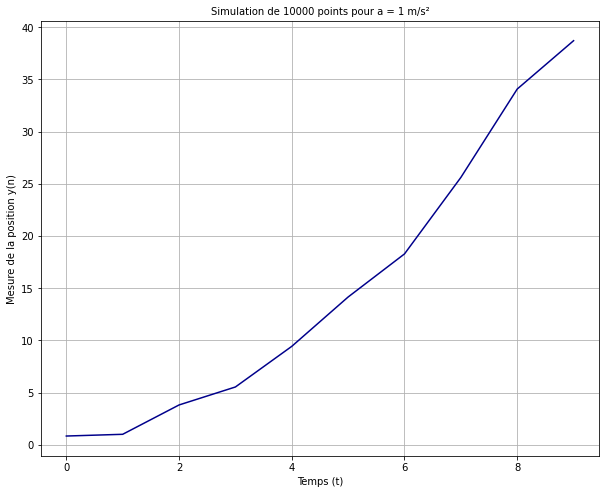

In [13]:
# Code de la réponse à la question 2.12. Ne pas effacer ce commentaire.
plt.plot(t[:10], y[:10], color='darkblue')
plt.grid()
plt.title("Simulation de 10000 points pour a = 1 m/s²",fontsize=10)

plt.xlabel('Temps (t)')
plt.ylabel('Mesure de la position y(n)')

plt.show()

### Question 2.13. Après avoir déterminé $\mathbb{E}[y(n)]$, simuler $\mathbb{E}[y(n)]$ pour 10000 points de mesure en prenant une accélération $a = 1ms^{-2}$.

On a $E(y(n)) = E(a\frac{t_{n}^2}{2}) + E(b(n))$ par linéarité de l'espérance. Puisque le bruit est de moyenne nulle et $a$ de nature déterministe alors : $E(y(n)) = a\frac{t_{n}^2}{2}$.

In [14]:
# Code de la réponse à la question 2.13. Ne pas effacer ce commentaire.
avg_y = (a*(t**2)/2)

### Question 2.14. Tracer le résultat de la question 2.13 en fonction du temps.

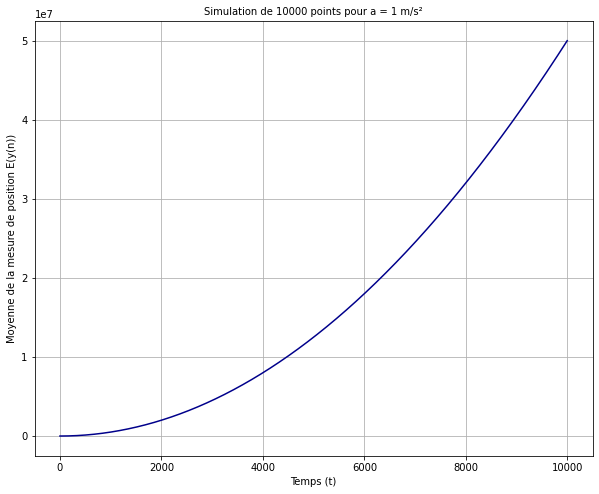

In [15]:
# Code de la réponse à la question 2.14. Ne pas effacer ce commentaire.
plt.plot(t, avg_y, color='darkblue')
plt.grid()
plt.title("Simulation de 10000 points pour a = 1 m/s²",fontsize=10)

plt.xlabel('Temps (t)')
plt.ylabel('Moyenne de la mesure de position E(y(n))')

plt.show()

### Question 2.15. Tracer le résultat de la question 2.13 sur 10 points en fonction du temps.

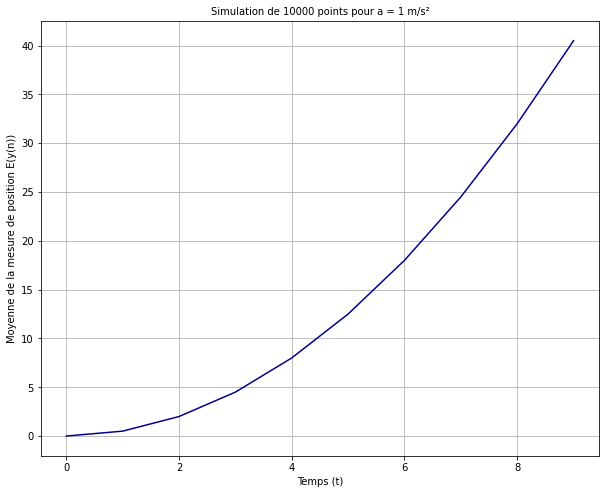

In [16]:
# Code de la réponse à la question 2.15. Ne pas effacer ce commentaire.
plt.plot(t[:10], avg_y[:10], color='darkblue')
plt.grid()
plt.title("Simulation de 10000 points pour a = 1 m/s²",fontsize=10)

plt.xlabel('Temps (t)')
plt.ylabel('Moyenne de la mesure de position E(y(n))')

plt.show()

**Pour les 10 premiers points pour lesquels la mesure de la position est encore faible, le bruit a un grand impact sur la courbe des données en fonction du temps qui est normalement parabolique et qui devrait être similaire à la fonction $x^2$. Ici nous voyons bien la forme de la courbe telle qu'attendue sans bruit.**

### Question 2.16. Après avoir déterminé la borne de Cramer - Rao relative à l'estimation de $a$ calculer cette borne pour un nombre de mesure $N = 2, 3, \cdots, 100$.

Puisque le bruit est blanc, les variables aléatoires sont décorrélées et puisqu'il est gaussien elles sont indépendantes, on a donc :  $p(y;a) = \prod_{n=0}^{N-1}\frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-1}{2}\frac{(y - a\frac{t_{n}^2}{2})^{2}}{\sigma^{2}}}$. Donc : $\frac{\partial ln (p(y;a))}{\partial a} = \frac{t_{n}^2}{2\sigma^2}\sum_{n=0}^{N-1}(y(n) - a\frac{t_{n}^2}{2})$. A ce stade nous pouvons vérifier que $E(\frac{\partial ln (p(y;a))}{\partial a}) = 0$ pour tout $a$ et calculer la dérivée seconde. On obtient alors : 
$$
\frac{\partial^2 ln (p(y;a))}{\partial a^2} = -\frac{1}{4\sigma^2}\sum_{n=0}^{N-1}t_{n}^4 = -\frac{N(N-1)(2N-1)(3N^2 - 3N -1)}{120\sigma^2}$$. Par suite : $I^{-1}(a) = \frac{120\sigma^2}{N(N-1)(2N-1)(3N^2 - 3N -1)}$ représente la variance minimale qu'on puisse atteindre (**Borne de Cramer-Rao**).

In [17]:
# Code de la réponse à la question 2.16. Ne pas effacer ce commentaire.
Cramer_Rao = []
N_values = [i for i in range (2,101)]
for N in N_values : 
    c = (120*(sigma_b**2))/(N*(N-1)*(2*N-1)*(3*(N**2)-3*N-1))
    Cramer_Rao.append(c)

### Question 2.17. Tracer le résultat de la question 2.16 en fonction de $N$.

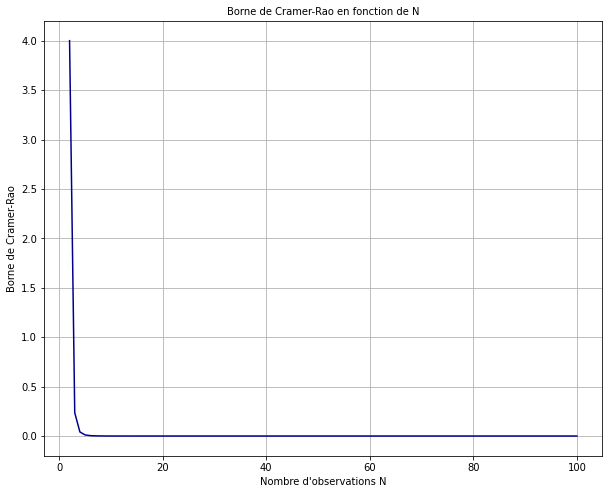

In [18]:
# Code de la réponse à la question 2.17. Ne pas effacer ce commentaire.
plt.plot(N_values, Cramer_Rao, color='darkblue')
plt.grid()
plt.title("Borne de Cramer-Rao en fonction de N",fontsize=10)

plt.xlabel('Nombre d\'observations N')
plt.ylabel('Borne de Cramer-Rao')

plt.show()

### Question 2.18. Tracer le résultat de la question 2.16 sur 10 points en fonction de $N$.

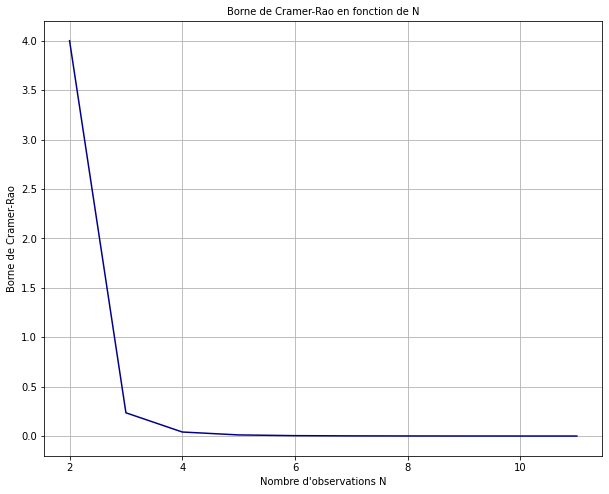

In [19]:
# Code de la réponse à la question 2.18. Ne pas effacer ce commentaire.
plt.plot(N_values[:10], Cramer_Rao[:10], color='darkblue')
plt.grid()
plt.title("Borne de Cramer-Rao en fonction de N",fontsize=10)

plt.xlabel('Nombre d\'observations N')
plt.ylabel('Borne de Cramer-Rao')

plt.show()

### Question 2.19. Après avoir déterminé un estimateur efficace pour l'estimation de $a$. Utiliser cet estimateur pour estimer et afficher une valeur de $\hat{a}$ à partir des mesures se trouvant dans le fichier "Exercice2.txt".

$$
\frac{\partial ln (p(y;a))}{\partial \theta} = \frac{1}{\sigma^2}\frac{N(N-1)(2N-1)(3N^2 - 3N -1)}{120}\left[\sum_{n=0}^{N-1} \frac{60 \,  t_{n}^2  \, y(n)}{N(N-1)(2N-1)(3N^2 - 3N -1)} - a \right]
$$
Par la suite : $\hat{a} = \sum_{n=0}^{N-1} \frac{60 \, t_{n}^2  \, y(n)}{N(N-1)(2N-1)(3N^2 - 3N -1)}$ est un estimateur efficace de $a$.

In [20]:
# Code de la réponse à la question 2.19. Ne pas effacer ce commentaire.
mesure = pd.read_csv('Exercice2.txt', sep=" ", header=None)
mesure = np.array(mesure[0])
t = np.array([i for i in range (100)])
N = 100
values = []
for n in range (100) :
    value = (60*(t[n]**2)*mesure[n])/(N*(N-1)*(2*N-1)*(3*(N**2)-3*N-1))
    values.append(value)
a_hat = sum(values)
a_hat

1.4999532579923842

### Question 2.20. Calculer et afficher la variance de cet estimateur.

L'estimateur $\hat{a}(y)$ est sans biais et à variance minimale car il atteint par sa construction la **borne de Cramer-Rao**, nous avons alors : $Var(\hat{a}) = I^{-1}(a) = \frac{120\sigma^2}{N(N-1)(2N-1)(3N^2 - 3N -1)}$

In [21]:
# Code de la réponse à la question 2.20. Ne pas effacer ce commentaire.
Var = (120*(sigma_b**2))/(N*(N-1)*(2*N-1)*(3*(N**2)-3*N-1))
Var

2.0509314682121544e-09

### Question 2.21. Commenter les résultats obtenus dans la cellule suivante.

Question 2.21. Ne pas effacer ce commentaire.

La variance de l'estimateur est très faible par rapport à l'ordre de grandeur des valeurs estimées. En effet : $P(|\hat{a} - a| \geq 3 \sigma_{\hat{a}}) = 2P(\frac{\hat{a} - a}{\sigma_{\hat{a}}} \geq 1) < 0.004$ car l'estimateur est sans biais. L'estimateur est donc très fiable pour l'estimateur de l'accélération $a$.

## Exercice 3

Considérons le jeu pile ou face. Sur 5000 lancers, le joueur constate qu'il obtient 3635 fois "pile" et 1365 fois "face". Il est alors possible de considérer que les 5000 lancers $(\ell_1,\ \ell_2,\ \cdots,\ \ell_{5000})$ sont des réalisation i.i.d. d'une variable aléatoire suivant une loi de Bernoulli $\mathcal{B}(p)$ dont le paramètre $p$ est inconnu. Avec, $p=1$ si la valeur "pile" est obtenue et $p=0$ si la valeur "face" est obtenue.

Dans ces conditions, la variable $S=\sum X_i$ des variables de Bernoulli, compte le nombre de "pile" et suit une loi binomiale.

### Question 3.22. En utilisant un estimateur intuitif $\hat{p}$ de $p$ calculer et afficher une estimation de $p$.

Un estimateur intuitif est la moyenne empirique $\hat{p}(X) = \frac{1}{N}\sum_{n=0}^{N-1} X_{n}$. où $N$ est le nombre d'observations.

In [22]:
# Code de la réponse à la question 3.22. Ne pas effacer ce commentaire.
mesure = pd.read_csv('Exercice3.txt', sep=" ", header=None)
mesure = np.array(mesure[0])
N = len(mesure)
hat_p = sum(mesure)/N
hat_p

0.727

### Question 3.23. Déterminer l'estimateur du maximum de vraisemblance $\hat{p}$ de $p$ puis calculer et afficher une estimation de $p$ avec cet estimateur. On utilisera le fichier "Exercice3.txt" qui contient des échantillons d'une variable aléatoire de Bernoulli.

On a : $L_{N}(x_{1}, \cdots, x_{N};p) = p^s(1-p)^{N-s}$ où $s = x_{0} + \cdots + x_{N-1}$. D'où : $\frac{\partial L_{N}}{\partial p} = p^{s-1}(1-p)^{N-s-1}(s-Np)$. Puisque $p$ ne peut pas être égal à $0$ ou $1$ sinon $s=0$ ou $s=1$ ce qui n'est pas le cas d'où :
$$
\hat{p}(X) = \frac{1}{N}\sum_{n=0}^{N-1} X_{n}
$$

In [23]:
# Code de la réponse à la question 3.23. Ne pas effacer ce commentaire.
hat_p = sum(mesure)/N
hat_p

0.727

### Question 3.24. Commenter les résultats obtenus dans la cellule suivante.

Question 3.24. Ne pas effacer ce commentaire.

Notre estimateur intuitif est l'estimateur du maximum de vraisemblance. A noter que cet estimateur est convergent et le meilleur estimateur possible pour cet exemple car il maximise la vraisemblance.

## Exercice 4

Soit le relevé de mesures donné dans le Tableau ci-dessous. Les mesures du tableau représentent les tensions relevées aux bornes d'un circuit électrique à différents instants.

| Instants     | $t$ en secondes | $V_{m}$ en volts |
| :----------- | :-----------:   | -----------:     |
| $t_{1}$      | 1               | 6.58             |
| $t_{2}$      | 2               | 22.73            |
| $t_{3}$      | 3               | 48.62            |

Ces mesures sont représentées ci-dessous.

![Mesures](mesures.jpg)

Il apparaît sur le graphe de $V_{m}(t)$ que la courbe ressemble plus à une parabole qu'à une droite. Pour estimer les paramètres de cette parabole, on suppose que la mesure $V_{m}(t_{n})$ est en partie modélisée par :

$$
 V_{m}(t_{n}) = \theta_{1} + \theta_{2}t_{n} + \theta_{3}t_{n}^{2}
$$ 

Nous supposons de plus que la mesure est entachée d'un bruit additif $b(t_{n})$. Des études statistiques ont montré que ce bruit est blanc, gaussien de moyenne nulle et de variance $\sigma^{2} = 0.04$.

### Question 4.25. Montrer que ce problème d'estimation peut se mettre sous la forme d'un modèle de mesure linéaire $\mathbf{x} = \mathbf{H}\boldsymbol{\theta} + \mathbf{b}$. Calculer et afficher $\hat{\theta} = [\hat{\theta}_1, \hat{\theta}_2, \hat{\theta}_3]^T$.

Puisque la mesure est entachée d'un bruit additif notre obsertvation est : $V_{m}(t_{n}) = \theta_{1} + \theta_{2}t_{n} + \theta_{3}t_{n}^{2} + b(t_{n})$.

En prenant $x = [V_{m}(t_{0}),  \dots , V_{m}(t_{N-1})]^T$ avec $N$ le nombre d'observations, $\theta = (\theta_{1}, \theta_{2}, \theta_{3})^T$ et $H = \begin{bmatrix}
1 & t_{0} & t_{0}^2 \\
\vdots & \vdots & \vdots \\
1 & t_{N-1} & t_{N-1}^2
\end{bmatrix}$, le modèle de mesure linéaire obtenu est bien $x = H\theta + b$.

Puisque le bruit blanc est gaussien de variance $\sigma^2$ et $H$ de plein rang donc $H^TH$ inversible, alors :  

$$
\frac{\partial ln (p(x;\theta))}{\partial \theta} = \frac{1}{\sigma^2}H^TH \left[ (H^TH)^{-1} H^Tx - \theta \right]
$$  
Cette formulation est équivalente à l'existence d'un estimateur sans biais à variance minimale (Borne de Cramer-Rao), nous obtenons même l'**information de Fisher** notée $I(\theta) = \frac{1}{\sigma^2}H^TH$ et l'expression de cet estimateur : $\hat{\theta}(x) = (H^TH)^{-1} H^Tx$

In [24]:
# Code de la réponse à la question 4.25. Ne pas effacer ce commentaire.
x = np.array([6.58, 22.73, 48.62]).T
H = np.array([[1,1,1],[1,2,4],[1,3,9]])
H_T = H.T

inv_HH_T = inv(np.dot(H_T, H))
theta_hat = np.dot(np.dot(inv_HH_T, H_T), x)
theta_hat

array([0.17, 1.54, 4.87])

Question 4.25. Ne pas effacer ce commentaire.

$\hat{\theta}_1 = 0.17$,   $\hat{\theta}_2 = 1.54$,   $\hat{\theta}_3 = 4.87$.

### Question 4.26. Quelles sont les performances statistiques de cet estimateur ?

L'estimateur $\hat{\theta}(x)$ est sans biais et à variance minimale car il atteint par sa construction la borne de Cramer-Rao, nous avons alors : $Var(\hat{\theta_{i}}) = \left[I^{-1}(\theta)\right]_{i,i}$

In [25]:
# Code de la réponse à la question 4.26. Ne pas effacer ce commentaire.
sigma = np.sqrt(0.04)
I = (1/(sigma**2)) * np.dot(H_T, H)
inv_I = inv(I)
inv_I

array([[ 0.76, -0.84,  0.2 ],
       [-0.84,  0.98, -0.24],
       [ 0.2 , -0.24,  0.06]])

Question 4.26. Ne pas effacer ce commentaire.

Les variances de $Var(\hat{\theta}_1) = 0.76$, $Var(\hat{\theta}_2) = 0.98$, $Var(\hat{\theta}_3) = 0.06$.

### Question 4.27. On considère la variable aléatoire $\epsilon_i = \hat{\theta}_i(\mathbf{x}) - \theta_i$ . Montrer que $\epsilon_i$ est une variable aléatoire normale dont on déterminera la moyenne et la variance.

Puisque $\hat{\theta}(x) = (H^TH)^{-1} H^Tx$ alors chaque $\hat{\theta_{i}}$ est une variable aléatoire gaussienne comme somme pondérée de variables aléatoires gaussiennes $x(n)$. L'estimateur $\hat{\theta}(x)$ est sans biais donc les $\epsilon_i$ sont d'espérance nulle. De plus, puisque $\theta$ est de nature déterministe et donc constant, on a aussi $Var(\epsilon) = Var(\hat{\theta})$.

Question 4.27. Ne pas effacer ce commentaire.

$Moyenne = [0, 0, 0]$, $Variance = [0.76, 0.98, 0.06]$.

### Question 4.28. Commenter les résultats obtenus dans la cellule suivante.

In [26]:
Ecart_type = np.sqrt(np.diag(inv_I))
Ecart_type

array([0.87177979, 0.98994949, 0.24494897])

Question 4.28. Ne pas effacer ce commentaire.

Afin d'évaluer les performances de notre estimateur, il faut calculer la probabilité de faire une erreur sur l'estimation des $\hat{\theta_{i}}$. Je prends ici la probabilité de s'écarter de la moyenne de chaque $\hat{\theta_{i}}$ de plus de $\sigma_{\epsilon{i}}$.  
On a alors : $P(|\hat{\theta_{i}} - \theta_{i}|\geq \sigma_{\hat{\theta_{i}}}) = P(\epsilon{i} \notin \left[-\sigma_{\epsilon{i}}, \sigma_{\epsilon{i}} \right]) = 2P(\epsilon{i} \geq \sigma_{\epsilon{i}})$ (car la distribution gaussienne est symétrique).

Donc d'après le tableau de valeurs d'une loi normale centrée réduite $\mathcal{N}(0,1)$, j'obtiens :

$P(|\hat{\theta_{i}} - \theta_{i}| \geq \sigma_{\hat{\theta_{i}}}) = 2P(\frac{\epsilon_{i}}{\sigma_{\epsilon_{i}}} \geq 1) = 0.318$.  

On a $[\hat{\theta}_1, \hat{\theta}_2, \hat{\theta}_3] = [0.17, 1.54, 4.87]$ et $\sigma(\hat{\theta}) = [0.87, 0.98, 0.24]$. Les distributions des $\hat{\theta_{i}}$ sont des gaussiennes étalées puisque la probabilité de faire une erreur en sortant de l'intervalle $\left[-\sigma_{\epsilon{i}}, \sigma_{\epsilon{i}} \right]$ est élevée égale à $0.318$ alors que la valeur des écarts-types est aussi élevée par rapport à l'ordre de grandeur des valeurs estimées surtout pour $\hat{\theta_{1}}$ et $\hat{\theta_{2}}$. Enfin, $\hat{\theta_{3}}$ reste le plus fiable et précis avec $\hat{\theta}_3 = 4.87$ et $\sigma(\hat{\theta}_3) = 0.24$ même si globalement l'estimateur $\hat{\theta}$ n'est pas fiable pour l'estimation de $\theta$.

## Exercice 5

Soit à estimer la valeur d'une constante $C$ noyée dans un bruit blanc $b(n)$ de variance $\sigma^{2} = 10$, mais de densité de probabilité inconnue. Le modèle de mesure utilisé est :

$$
 x(n) = C + b(n)
$$

Les mesures sont dans le fichier "Exercice5.txt".

### Question 5.29. Calculer et afficher la moyenne et la variance des mesures.

In [27]:
# Code de la réponse à la question 5.29. Ne pas effacer ce commentaire.
mesure = pd.read_csv('Exercice5.txt', sep=" ", header=None)
mesure = np.array(mesure[0])
mu_x = np.mean(mesure)
var_x = np.var(mesure)
print("la moyenne des mesures est : " + str(round(mu_x)))
print("la variance des mesures est : " + str(round(var_x)))

la moyenne des mesures est : 12.0
la variance des mesures est : 10.0


### Question 5.30. Calculer et afficher la matrice d'autocorrétation des mesures. $\boldsymbol{\Gamma}_{x}$.

Les élements diagonaux de $\Gamma_{x}$ contiennent les variances de variables aléatoires $x(n)$. On a alors : $(\forall i \in {1, \cdots, N}) : \Gamma_{x_{i,i}} = \sigma^2$. Pour les autres élements de la matrice on a : $(\forall i,j \in {1, \cdots, N}) : \Gamma_{x_{i,j}} = E(b(i)b(j)) = E(b(i))E(b(j)) = 0 \: pour \: i \ne j $ (car les variables aléatoires d'un bruit blanc sont par définition décorrélées. Donc :
$$
\Gamma_{x} = \begin{bmatrix}
\sigma^2  & \cdots & 0\\
\vdots & \ddots & \vdots \\
0 & \cdots & \sigma^2
\end{bmatrix}
$$

In [28]:
# Code de la réponse à la question 5.30. Ne pas effacer ce commentaire.
shape = (len(mesure),len(mesure))
Z = np.zeros(shape)
sigma = np.sqrt(10)
diag = np.diag([sigma**2 for i in range (len(mesure))])
Gamma = Z + diag
Gamma

array([[10.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 10.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 10.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 10.]])

### Question 5.31. En utilisant l'estimateur approprié à ce problème d'estimation calculer et afficher une estimation $\hat{C}$ de la constante $C$.

On essaye ici d'imposer à notre estimateur d'être linéaire par rapport aux données et qu'il soit sans biais à variance minimale. En effet, l'hypothèse $E(x(n)) = s(n)C$ est vérifiée avec $s(n) = [1, \cdots, 1]^T$. On utilise donc l'estimateur $\hat{C} = \left(\frac{s^T\Gamma_{x}^{-1}}{s^T\Gamma_{x}^{-1}s}\right)x$

In [29]:
# Code de la réponse à la question 5.31. Ne pas effacer ce commentaire.
s = np.array([1 for i in range(len(mesure))])
s_T = np.array([1 for i in range(len(mesure))]).T
inv_Gamma = Z + np.diag([(1/sigma**2) for i in range (len(mesure))])

hat_C = np.dot((np.dot(s_T,inv_Gamma)/np.dot(np.dot(s_T, inv_Gamma),s)),mesure)

In [30]:
hat_C

11.993563058103355

### Question 5.32. Evaluer et afficher les performances statistique de cet estimateur.

L'estimateur $\hat{C}$ est sans biais, de variance $V(\hat{C}) = \frac{1}{s^T\Gamma_{x}^{-1}s}$

In [31]:
# Code de la réponse à la question 5.32. Ne pas effacer ce commentaire.
var_hat_C = 1/np.dot(np.dot(s_T, inv_Gamma),s)
var_hat_C

0.0009999999999999944

### Question 5.33. Commenter les résultats obtenus dans la cellule suivante.

Question 5.33. Ne pas effacer ce commentaire.

La variance de l'estimateur est très faible par rapport à l'ordre de grandeur des valeurs estimées (valeur moyenne de 12). En effet : $P(|\hat{C} - C| \geq 3 \sigma_{\hat{C}}) = 2P(\frac{\hat{C} - C}{\sigma_{\hat{c}}} \geq 1) < 0.004$ car l'estimateur est sans biais. L'estimateur est donc très fiable pour l'estimateur de la constante $C$.

## Exercice 6

Soit le modéle de mesure :

$$
    x(n) = s(n) + b(n) \quad n = 0, 1, \cdots, N-1
$$

Avec $b(n)$ un bruit dont la moyenne est nulle, ses échantillons sont indépendant et identiquement distribués (iid) suivant une loi de Laplace.

$$
    p(b(n)) = \frac{1}{4} \exp\left[-\frac{1}{2} \vert b(n) \vert \right]
$$

On cherche à estimer $\boldsymbol{\theta} = [s(0), s(1), \cdots, s(N-1)]^T$ à l'aide d'un estimateur du maximum de vraisemblance.

### Question 6.34. Proposer un estimateur pour chaque composante de $\boldsymbol{\theta}$ .

Si nous voulons un estimateur pour chaque composante de $\theta$. Nous considérons alors que nous avons une seule observation pour chaque composante. D'après la question, nous voulons utiliser un estimateur de maximum de vraisemblance alors :
$$
L_{N}(x;s) = \prod_{n=0}^{N-1} p(x(n);s(n)) = \frac{1}{4^N}exp\left[\sum_{n=0}^{N-1}-\frac{1}{2}|x(n) - s(n)|\right]
$$
D'où :
$$
ln(L_{N}(x;s)) = -ln(4^N) -\frac{1}{2}\sum_{n=0}^{N-1}|x(n)-s(n)|
$$

Maximiser le logarithme de la vraisemblance revient donc à minimiser $\sum_{n=0}^{N-1}|x(n)-s(n)| \geq 0$ par rapport à tous les $s(n)$. On prend donc $\hat{s}(n) = x(n)$.

Question 4.28. Ne pas effacer ce commentaire.

$\hat{s}(n) = x(n)$

### Question 6.35 Commenter les résultats obtenus dans la cellule suivante.

Question 6.35. Ne pas effacer ce commentaire.

L'estimateur $\hat{s(n)}$ est sans biais mais non convergent (car il ne fait pas intervenir le nombre d'observations) et de variance inconnue parce que sa variance fait intervenir la variance de $x(n)$. Vu qu'il n'y a aucune remarque sur l'énoncé de l'exercice j'ai supposé que $\theta$ est de nature déterministe, s'il est aléatoire de distribution gaussienne par exemple, nous pourrons utiliser un filtre de Wiener pour déterminer $\hat{s(n)}$.

## Exercice 7

On veut modéliser les données du fichier Galaxy.xlsx sous la forme d'un mélange de gaussiennes, et donc estimer les paramètres du mélanges. Utiliser l'algorithme EM vu en cours pour effectuer cette estimation. La description des données du fichier Galaxy.xlsx se trouve dans le fichier galaxydatasetdescription.pdf.

### Question 7.36 Estimation des paramètres du mélange de gaussiennes.

In [32]:
# Code de la réponse à la question 7.36. Ne pas effacer ce commentaire.
vitesses = pd.read_excel('Galaxy.xlsx', header = None)
vitesses = np.array(vitesses[0])

In [98]:
def gm_pdf(x, mu, sigma, p):
    #Initialisation de la variable de sortie
    resultat = 0.0
    #Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur les écarts-types')
    else:
    # Calcul de la valeur de la densité
        for i in range(0, len(p)):
            resultat = resultat + p[i] * norm.pdf(x, mu[i], sigma[i])
    return resultat

### Visualisation de la distribution des données

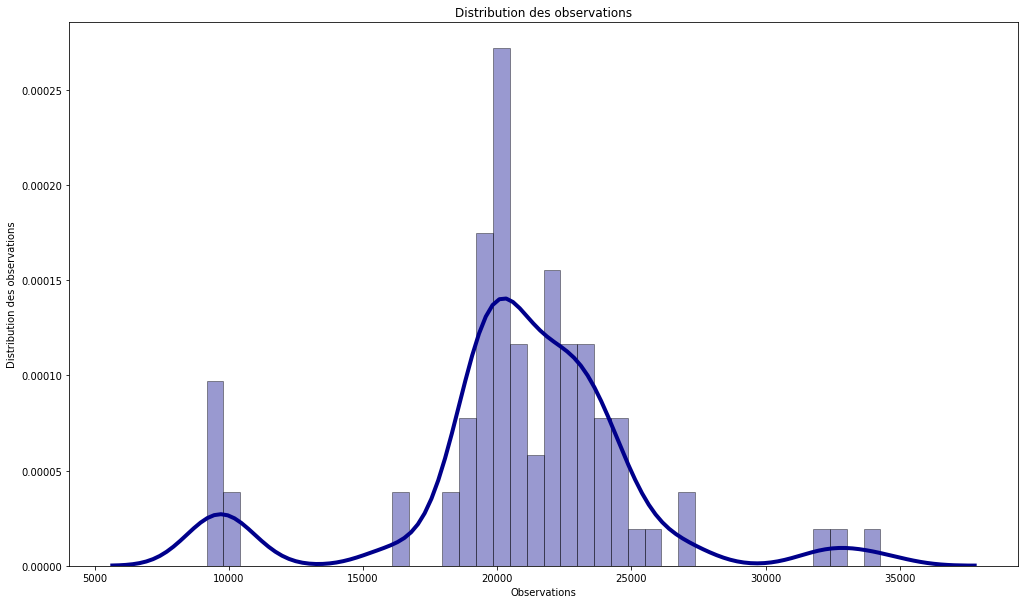

In [34]:
rcParams['figure.figsize'] = 17, 10
sns.distplot(vitesses, hist=True, kde=True, 
             bins = 40, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel("Observations"), plt.ylabel("Distribution des observations") 
plt.title('Distribution des observations')
plt.show()

**A travers la visualisation des données, j'ai également choisi de voir ce que la librairie seaborn donnerait comme courbe pour la distribution des données, cette courbe sert pour déterminer à peu près le nombre de gaussiennes que l'algorithme EM doit estimer dans la partie suivante. Je choisis donc 6 gaussiennes.**


### Algorithme EM 

### A noter que l'algorithme ci-dessous nécessite plusieurs compilations pour éviter d'avoir des erreurs à cause de valeurs manquantes. Vous pourrez consulter le fichier .html du notebook qui contient les résultats.

In [254]:
nbMaxIterations = 40

mu_em = np.random.randint(35000, size=(6))
sigma_em = np.random.randint(2000, size=(6))
alpha_em = np.array([0.2, 0.1, 0.3, 0.2, 0.1, 0.1])

nbIteration = 1 #Initialisation de la variable d'arrêt
nbComposante = len(alpha_em) #Nombre de composantes du mélange
nbDonnees = len(vitesses)  #Nombre de données
p = np.zeros(shape=(nbComposante, nbDonnees))
#Déclaration et initialisation de la matrice qui va contenir les probabilités
#p(k|x,theta_courant)
                       
alpha_em_new = alpha_em
sigma_em_carre_new = sigma_em
mu_em_new = mu_em
vitessesP = np.zeros(shape=(len(vitesses)))

while nbIteration < nbMaxIterations:
    for n in range(0, nbDonnees, 1):
        for k in range(0, nbComposante, 1):
            p[k, n] = alpha_em[k] * norm.pdf(x = vitesses[n], loc = mu_em[k], scale = sigma_em[k])
        p[:, n] = p[:, n] / np.sum(p[:, n])
    for k in range(0, nbComposante, 1):
        alpha_em_new[k] = np.sum(p[k,:]) / nbDonnees
        for n in range(0, nbDonnees, 1):
            vitessesP[n] = vitesses[n] * p[k, n]
        mu_em_new[k]  = np.sum(vitessesP) / np.sum(p[k, :])
        for n in range(nbDonnees):
            vitessesP[n] = ((vitesses[n] - mu_em_new[k]) ** 2) * p[k, n]
        sigma_em_carre_new[k] = np.sum(vitessesP) / np.sum(p[k, :])
    mu_em = mu_em_new
    sigma_em = np.sqrt(sigma_em_carre_new)
    alpha_em = alpha_em_new
    nbIteration = nbIteration + 1

In [255]:
print('Les paramètres estimés sont : ')
print('Moyennes des composantes du mélange', mu_em)
print('Ecrat type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

Les paramètres estimés sont : 
Moyennes des composantes du mélange [ 9710 22880 33044 20942 19829 25077]
Ecrat type des composantes du mélange [ 422.47958531  962.42765962  921.7179612  2674.21521198  621.26000998
 1563.88266823]
Probabilités des composantes du mélange [0.0853529  0.27769101 0.03657597 0.20294962 0.33846967 0.05896083]


In [256]:
print('La somme des probabilités des composantes du mélange vaut : ', np.sum(alpha_em))

La somme des probabilités des composantes du mélange vaut :  1.0000000000000002


### Visualisation de la distribution des données avec la courbe du mélange de gaussienne

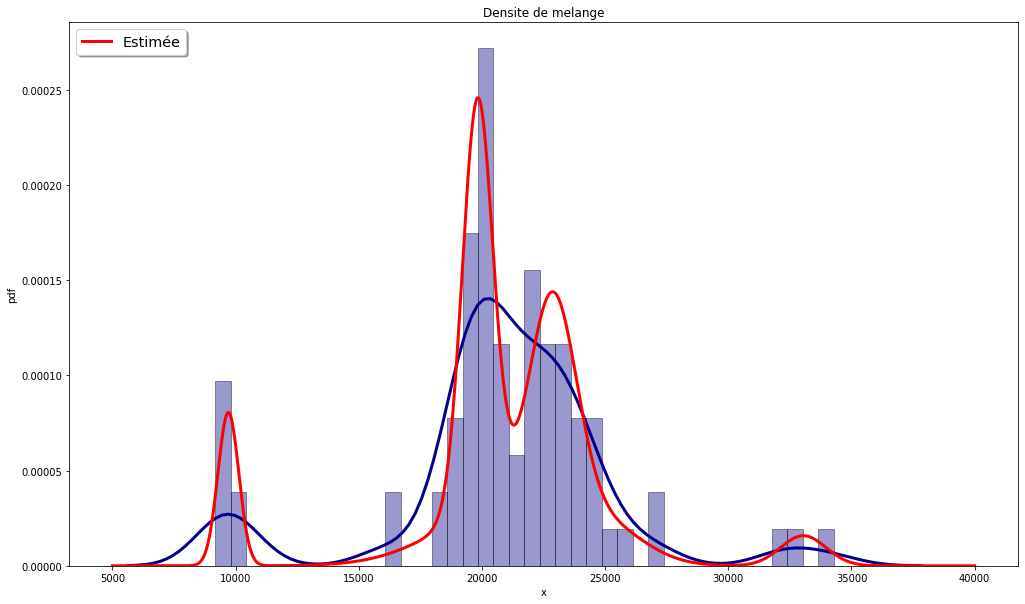

In [288]:
rcParams['figure.figsize'] = 17, 10
x = np.arange(5000,40000, 0.1)
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
sns.distplot(vitesses, hist=True, kde=True, 
             bins = 40, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.plot(x, pointPdfEstime, 'r-', linewidth = 3, label = 'Estimée')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()